In [1]:
import kagglehub
import pandas as pd
import os
import numpy as np

# Tải dataset và lấy đường dẫn
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")
print("Path to dataset files:", path)

# Tìm tệp CSV
for file in os.listdir(path):
    if file.endswith('.csv'):
        csv_path = os.path.join(path, file)
        break
else:
    print("Không tìm thấy tệp CSV trong thư mục.")
    exit()

# Đọc dữ liệu
data = pd.read_csv(csv_path)

# Bước 1: Xóa cột không cần thiết
# Xóa cột 'id' và bất kỳ cột nào có tên chứa 'Unnamed'
columns_to_drop = [col for col in data.columns if 'id' in col.lower() or 'unnamed' in col.lower()]
if columns_to_drop:
    data = data.drop(columns=columns_to_drop)
    print(f"\nĐã xóa các cột không cần thiết: {columns_to_drop}")
else:
    print("\nKhông có cột nào cần xóa.")

# Bước 2: Kiểm tra và xóa giá trị trùng lặp
duplicates = data.duplicated().sum()
if duplicates > 0:
    data = data.drop_duplicates()
    print(f"Đã xóa {duplicates} hàng trùng lặp.")
else:
    print("Không có hàng trùng lặp.")

# Bước 3: Kiểm tra và xử lý giá trị thiếu
missing_values = data.isnull().sum()
if missing_values.sum() > 0:
    print("\nCác cột chứa giá trị thiếu:\n", missing_values[missing_values > 0])
    data = data.dropna()
    print(f"Đã xóa các hàng chứa giá trị thiếu (tổng cộng {missing_values.sum()} giá trị).")
else:
    print("Không có giá trị thiếu.")

# Bước 4: Kiểm tra và xử lý giá trị bất thường (outliers)
# Kiểm tra các cột số để tìm giá trị âm (không hợp lý với đặc trưng vật lý)
numeric_cols = data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if (data[col] < 0).any():
        print(f"Cột {col} chứa giá trị âm, thay thế bằng NaN.")
        data[col] = data[col].mask(data[col] < 0, np.nan)
if data.isnull().sum().sum() > 0:
    data = data.dropna()
    print("Đã xóa các hàng chứa giá trị bất thường sau khi xử lý.")

# Bước 5: Mã hóa cột 'diagnosis'
if 'diagnosis' in data.columns:
    # Kiểm tra giá trị duy nhất trong cột diagnosis
    unique_values = data['diagnosis'].unique()
    print(f"Giá trị trong cột 'diagnosis': {unique_values}")
    if set(unique_values).issubset({'M', 'B'}):
        data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
        print("Đã mã hóa cột 'diagnosis' thành 0 (B) và 1 (M).")
    else:
        print("Cột 'diagnosis' chứa giá trị không hợp lệ, dừng xử lý.")
        exit()
else:
    print("Không tìm thấy cột 'diagnosis' trong dataset.")
    exit()

# Kiểm tra dữ liệu sau khi làm sạch
print("\nThông tin dataset sau khi làm sạch:")
print(data.info())
print("\n5 dòng đầu tiên:")
print(data.head())

# Lưu dataset sạch
output_path = 'breast_cancer_cleaned.csv'
data.to_csv(output_path, index=False)
print(f"\nĐã lưu dataset sạch vào '{output_path}'.")

Path to dataset files: C:\Users\Admin\.cache\kagglehub\datasets\uciml\breast-cancer-wisconsin-data\versions\2

Đã xóa các cột không cần thiết: ['id', 'Unnamed: 32']
Không có hàng trùng lặp.
Không có giá trị thiếu.
Giá trị trong cột 'diagnosis': ['M' 'B']
Đã mã hóa cột 'diagnosis' thành 0 (B) và 1 (M).

Thông tin dataset sau khi làm sạch:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave po

In [11]:
import pandas as pd

# Đọc dữ liệu đã làm sạch
data = pd.read_csv('breast_cancer_cleaned.csv')

# Tính thống kê mô tả
description = data.describe()

# Hiển thị kết quả
print(description)

        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720       

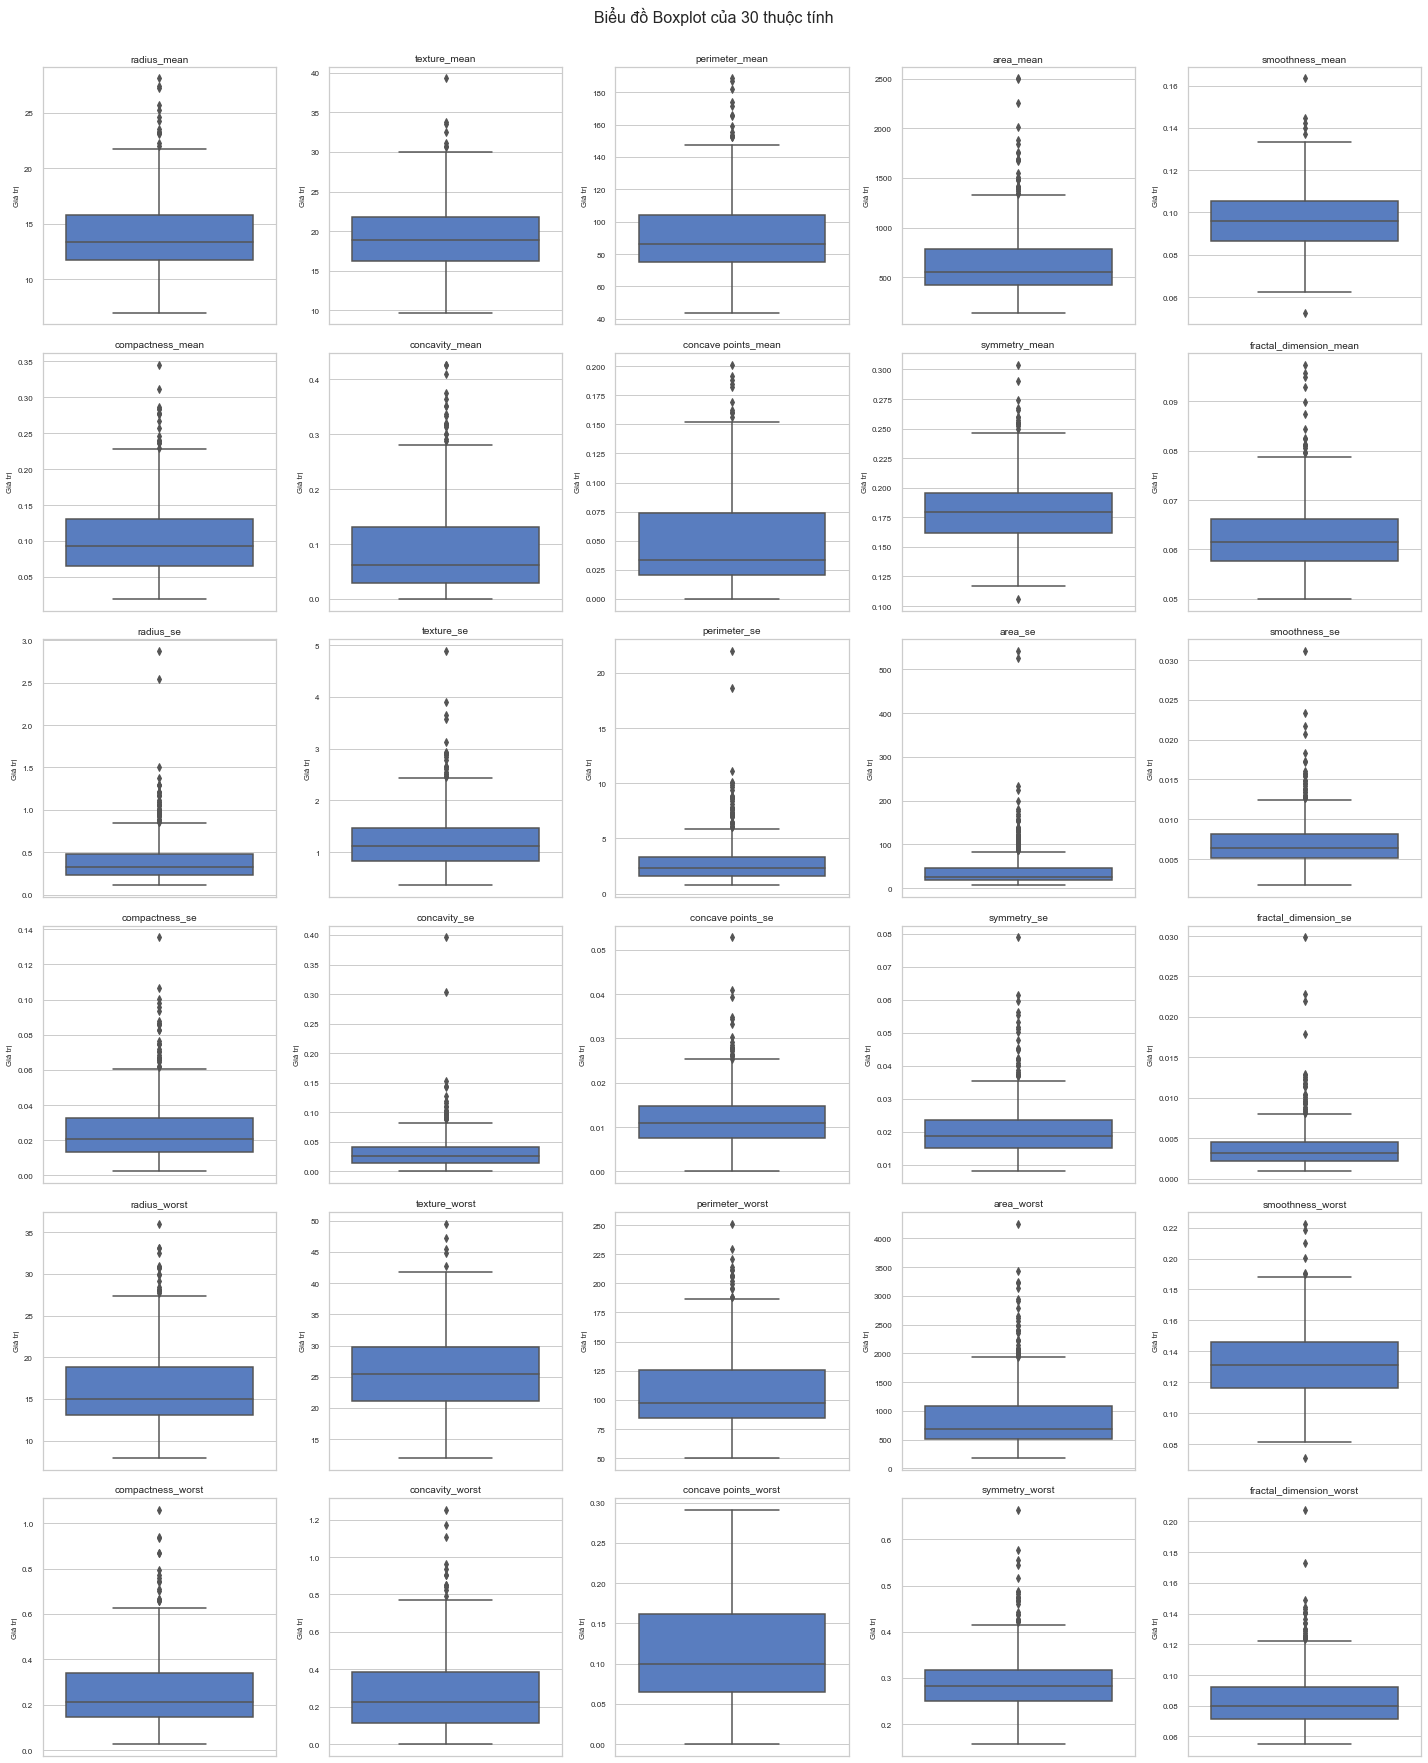

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file CSV
data = pd.read_csv('breast_cancer_cleaned.csv')

# Loại bỏ cột 'diagnosis' để chỉ lấy các thuộc tính số
features = [col for col in data.columns if col != 'diagnosis']

# Thiết lập kích thước và bố cục lưới (6 hàng x 5 cột để chứa 30 thuộc tính)
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 24))
axes = axes.flatten()  # Chuyển ma trận axes thành mảng 1D để dễ duyệt

# Vẽ boxplot cho từng thuộc tính
for i, feature in enumerate(features):
    sns.boxplot(y=data[feature], ax=axes[i])
    axes[i].set_title(feature, fontsize=10)
    axes[i].set_ylabel('Giá trị', fontsize=8)
    axes[i].tick_params(axis='both', labelsize=8)

# Xóa các axes không sử dụng (nếu có)
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

# Điều chỉnh bố cục để tránh chồng lấn
plt.tight_layout()
plt.suptitle('Biểu đồ Boxplot của 30 thuộc tính', fontsize=16, y=1.02)
plt.show()

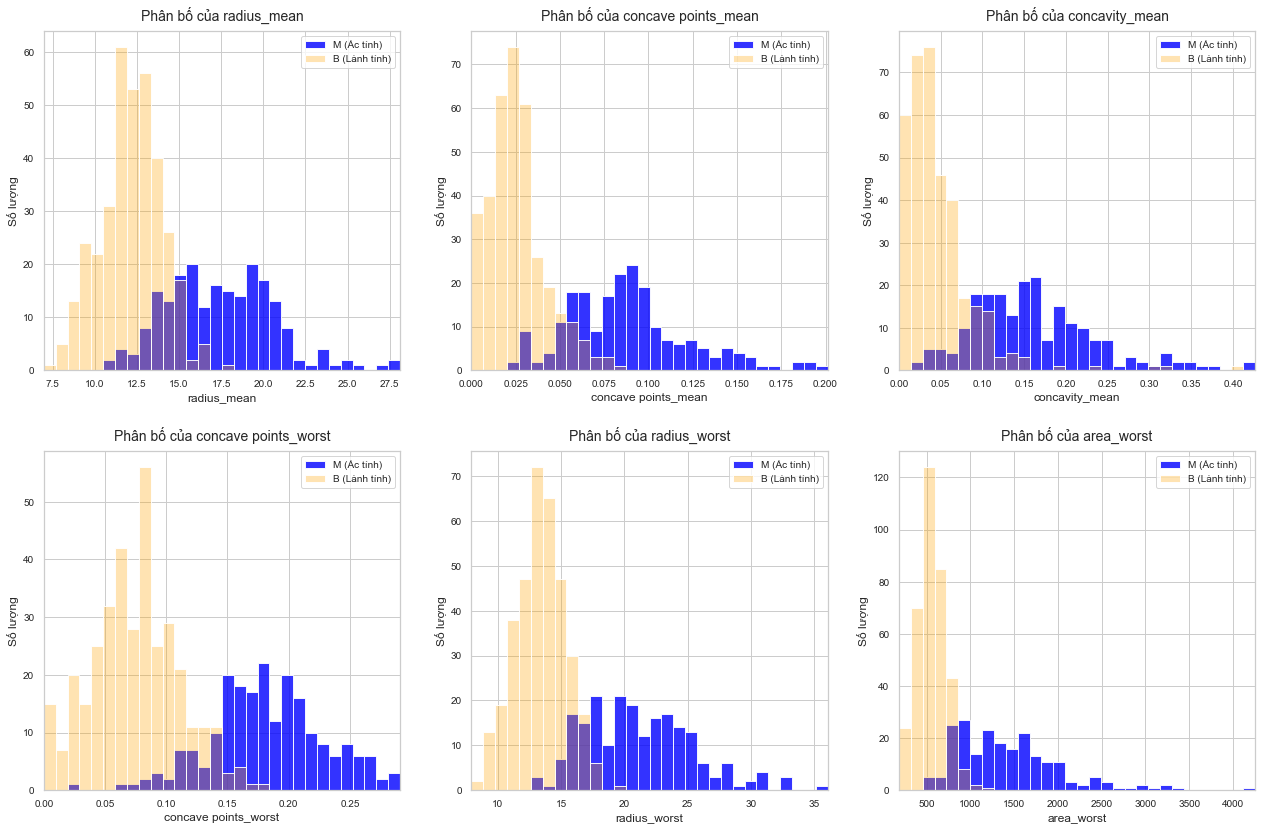

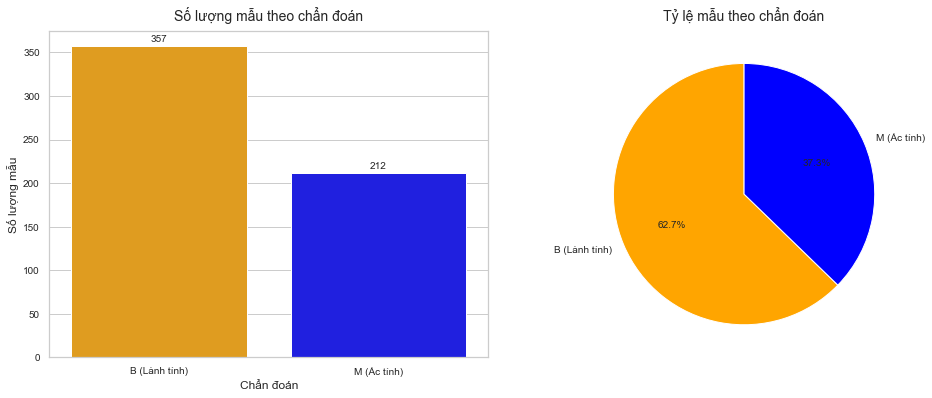

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Đọc dataset đã làm sạch
data = pd.read_csv('breast_cancer_cleaned.csv')

# Các đặc trưng được chọn
selected_features = ['radius_mean', 'concave points_mean', 'concavity_mean', 
                    'concave points_worst', 'radius_worst', 'area_worst']

# Thêm nhãn lớp dạng chữ để dễ đọc trên biểu đồ
data['diagnosis_label'] = data['diagnosis'].map({0: 'B (Lành tính)', 1: 'M (Ác tính)'})

# Đếm số lượng mẫu theo nhãn
diagnosis_counts = data['diagnosis_label'].value_counts()

# Thiết lập style cho seaborn
sns.set(style="whitegrid", palette="muted")

# 1. Histogram cho từng đặc trưng với làm mờ lớp "B (Lành tính)"
plt.figure(figsize=(18, 12))  # Tăng kích thước tổng thể của biểu đồ
for i, feature in enumerate(selected_features, 1):
    # Tạo subplot với kích thước lớn hơn
    ax = plt.subplot(2, 3, i)
    bin_edges = np.histogram_bin_edges(data[feature], bins=30)
    # Vẽ histogram với ranh giới bin chung
    sns.histplot(data=data[data['diagnosis_label'] == 'M (Ác tính)'], x=feature, color='blue', label='M (Ác tính)', bins=bin_edges, alpha=0.8, ax=ax)
    sns.histplot(data=data[data['diagnosis_label'] == 'B (Lành tính)'], x=feature, color='orange', label='B (Lành tính)', bins=bin_edges, alpha=0.3, ax=ax)
    plt.title(f'Phân bố của {feature}', fontsize=14, pad=10)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Số lượng', fontsize=12)
    plt.legend(fontsize=10)  # Tăng cỡ chữ chú thích
    # Đảm bảo phạm vi trục x phù hợp
    ax.set_xlim(data[feature].min(), data[feature].max())
    ax.tick_params(axis='both', labelsize=10)  # Tăng cỡ chữ số trên trục
plt.tight_layout(pad=2.0)  # Tăng khoảng cách giữa các subplot
plt.show()

# 2. Biểu đồ cột và biểu đồ tròn
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # Tăng kích thước tổng thể của biểu đồ

# Biểu đồ cột (Bar Plot)
colors_bar = ['blue' if label == 'M (Ác tính)' else 'orange' for label in diagnosis_counts.index]
sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values, ax=ax1, palette=colors_bar)
ax1.set_title('Số lượng mẫu theo chẩn đoán', fontsize=14, pad=10)
ax1.set_xlabel('Chẩn đoán', fontsize=12)
ax1.set_ylabel('Số lượng mẫu', fontsize=12)
ax1.tick_params(axis='both', labelsize=10) 
for i, count in enumerate(diagnosis_counts.values):
    ax1.text(i, count + 5, str(count), ha='center', fontsize=10)

# Biểu đồ tròn (Pie Chart)
colors_pie = ['blue' if label == 'M (Ác tính)' else 'orange' for label in diagnosis_counts.index]
ax2.pie(diagnosis_counts.values, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=90, colors=colors_pie, textprops={'fontsize': 10})
ax2.set_title('Tỷ lệ mẫu theo chẩn đoán', fontsize=14, pad=10)

# Điều chỉnh layout
plt.tight_layout(pad=2.0)
plt.show()

có bao nhiêu giá trị eigenvalues :6


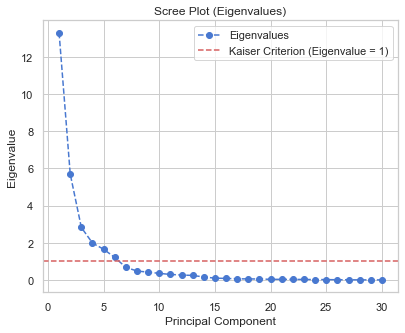

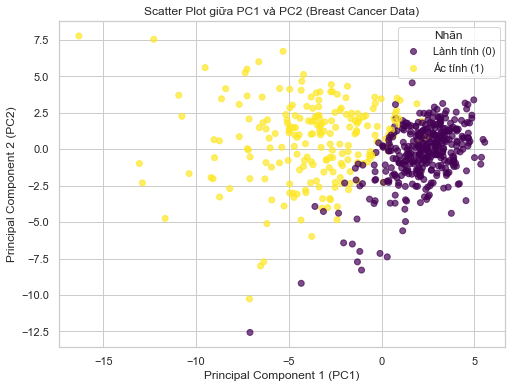

KNN với k=1: Độ chính xác trung bình (5-fold CV) = 0.9578 ± 0.0190
KNN với k=2: Độ chính xác trung bình (5-fold CV) = 0.9578 ± 0.0190
KNN với k=3: Độ chính xác trung bình (5-fold CV) = 0.9630 ± 0.0180
KNN với k=4: Độ chính xác trung bình (5-fold CV) = 0.9578 ± 0.0213
KNN với k=5: Độ chính xác trung bình (5-fold CV) = 0.9596 ± 0.0106
KNN với k=6: Độ chính xác trung bình (5-fold CV) = 0.9613 ± 0.0120
KNN với k=7: Độ chính xác trung bình (5-fold CV) = 0.9631 ± 0.0103
KNN với k=8: Độ chính xác trung bình (5-fold CV) = 0.9595 ± 0.0154
KNN với k=9: Độ chính xác trung bình (5-fold CV) = 0.9561 ± 0.0136
KNN với k=10: Độ chính xác trung bình (5-fold CV) = 0.9596 ± 0.0119
KNN với k=11: Độ chính xác trung bình (5-fold CV) = 0.9596 ± 0.0105
KNN với k=12: Độ chính xác trung bình (5-fold CV) = 0.9613 ± 0.0070
KNN với k=13: Độ chính xác trung bình (5-fold CV) = 0.9578 ± 0.0102
KNN với k=14: Độ chính xác trung bình (5-fold CV) = 0.9578 ± 0.0116
KNN với k=15: Độ chính xác trung bình (5-fold CV) = 0.957

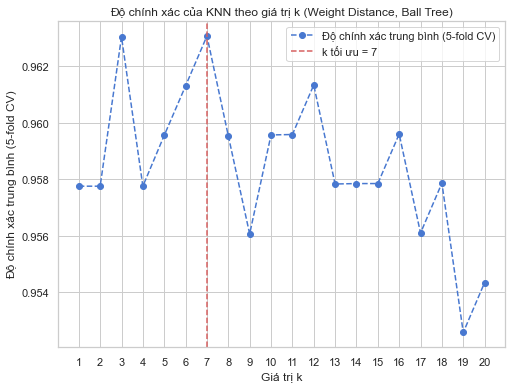


Kết quả huấn luyện KNN với k=7 trên tập kiểm tra:
Accuracy: 0.9474
Precision: 0.9737
Recall: 0.8810
F1-Score: 0.9250

Báo cáo phân loại chi tiết:
               precision    recall  f1-score   support

Lành tính (0)       0.93      0.99      0.96        72
  Ác tính (1)       0.97      0.88      0.93        42

     accuracy                           0.95       114
    macro avg       0.95      0.93      0.94       114
 weighted avg       0.95      0.95      0.95       114


Ma trận nhầm lẫn:
[[71  1]
 [ 5 37]]


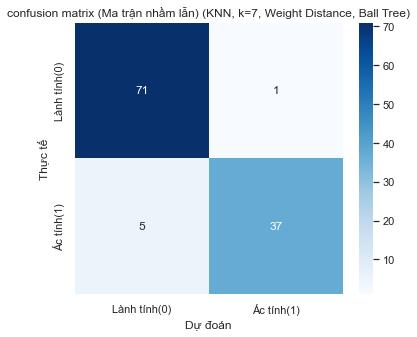

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Bước 1: Tải và chuẩn bị dữ liệu
data = pd.read_csv('breast_cancer_cleaned.csv')
X = data.drop('diagnosis', axis=1)  # Đặc trưng
y = data['diagnosis']  # Nhãn (0: lành tính, 1: ác tính)

# Chuẩn hóa z-score
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Bước 2: Áp dụng PCA và giữ các PCs có eigenvalue >= 1 (Kaiser Criterion)
# Tính ma trận hiệp phương sai
cov_matrix = np.cov(X_scaled.T)

# Tính giá trị riêng và vector riêng
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sắp xếp giảm dần
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Giữ các PCs có eigenvalue >= 1
n_selected = np.sum(eigenvalues >= 1)  # 7 PCs
selected_eigenvalues = eigenvalues[:n_selected]
selected_eigenvectors = eigenvectors[:, :n_selected]
print(f"có bao nhiêu giá trị eigenvalues :{n_selected}")

# Vẽ đồ thị PCA
plt.figure(figsize=(14, 5))

# Scree Plot
plt.subplot(1, 2, 1)
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--', label='Eigenvalues')
plt.title('Scree Plot (Eigenvalues)')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--', label='Kaiser Criterion (Eigenvalue = 1)')
plt.legend()
plt.grid(True)

# Bước 3: Chuyển đổi dữ liệu sang không gian PCs
X_pca = X_scaled @ selected_eigenvectors  # Dữ liệu đã giảm chiều: 569 mẫu x 6 PCs

plt.figure(figsize=(8, 6))
# Tạo scatter plot với màu sắc phân biệt giữa lớp lành tính (0) và ác tính (1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
# Thêm chú thích (legend) cho các lớp
plt.legend(handles=scatter.legend_elements()[0], labels=['Lành tính (0)', 'Ác tính (1)'], title="Nhãn")
plt.title('Scatter Plot giữa PC1 và PC2 (Breast Cancer Data)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True)
plt.show()

# Bước 4: Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# Bước 5: Huấn luyện KNN với weight distance và thuật toán Ball Tree
# Thử nghiệm với các giá trị k khác nhau để tìm k tối ưu
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='ball_tree')
    scores = cross_val_score(knn, X_pca, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    print(f"KNN với k={k}: Độ chính xác trung bình (5-fold CV) = {scores.mean():.4f} ± {scores.std():.4f}")

# Tìm k tối ưu
best_k = k_values[np.argmax(cv_scores)]
best_cv_score = max(cv_scores)
print(f"\nK tối ưu cho KNN (weight distance, Ball Tree): {best_k}")
print(f"Độ chính xác trung bình tối ưu (5-fold CV): {best_cv_score:.4f}")

# Vẽ đồ thị độ chính xác của KNN theo từng giá trị k
plt.figure(figsize=(8, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='--', color='b', label='Độ chính xác trung bình (5-fold CV)')
plt.axvline(x=best_k, color='r', linestyle='--', label=f'k tối ưu = {best_k}')
plt.title('Độ chính xác của KNN theo giá trị k (Weight Distance, Ball Tree)')
plt.xlabel('Giá trị k')
plt.ylabel('Độ chính xác trung bình (5-fold CV)')
plt.xticks(range(1, 21, 1))
plt.legend()
plt.grid(True)
plt.show()

# Bước 6: Huấn luyện lại mô hình KNN với k tối ưu và đánh giá
knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance', algorithm='ball_tree')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"\nKết quả huấn luyện KNN với k={best_k} trên tập kiểm tra:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nBáo cáo phân loại chi tiết:")
print(classification_report(y_test, y_pred, target_names=['Lành tính (0)', 'Ác tính (1)']))
print("\nMa trận nhầm lẫn:")
print(conf_matrix)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Lành tính(0)', 'Ác tính(1)'], yticklabels=['Lành tính(0)', 'Ác tính(1)'])
plt.title(f'confusion matrix (Ma trận nhầm lẫn) (KNN, k={best_k}, Weight Distance, Ball Tree)')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()

Số thành phần chính được chọn (eigenvalue >= 1): 6


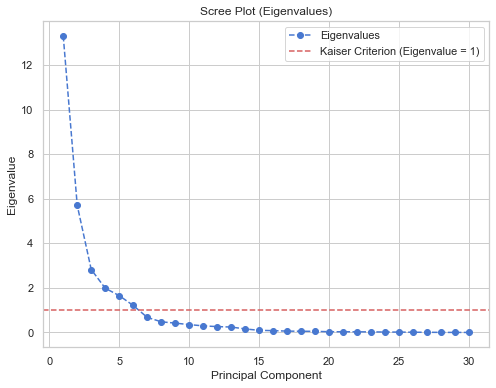

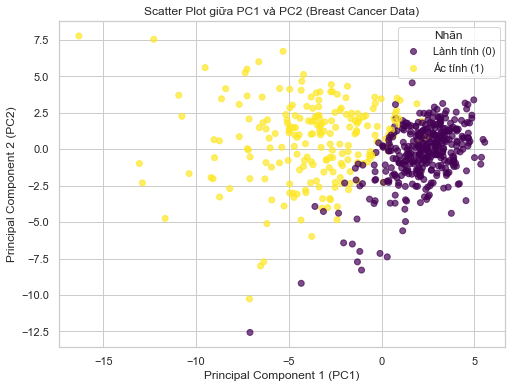

Linear SVM với C=0.01: Độ chính xác trung bình (5-fold CV) = 0.9631 ± 0.0065
Linear SVM với C=0.1: Độ chính xác trung bình (5-fold CV) = 0.9666 ± 0.0116
Linear SVM với C=1: Độ chính xác trung bình (5-fold CV) = 0.9631 ± 0.0035
Linear SVM với C=10: Độ chính xác trung bình (5-fold CV) = 0.9701 ± 0.0089
Linear SVM với C=100: Độ chính xác trung bình (5-fold CV) = 0.9684 ± 0.0089

C tối ưu cho Linear SVM từ 5-fold cross-validation: 10
Độ chính xác trung bình tối ưu (5-fold CV): 0.9701

Kết quả huấn luyện Linear Soft Margin SVM với C=10 trên tập kiểm tra:
Accuracy: 0.9737
Precision: 0.9756
Recall: 0.9524
F1-Score: 0.9639

Báo cáo phân loại chi tiết:
               precision    recall  f1-score   support

Lành tính (0)       0.97      0.99      0.98        72
  Ác tính (1)       0.98      0.95      0.96        42

     accuracy                           0.97       114
    macro avg       0.97      0.97      0.97       114
 weighted avg       0.97      0.97      0.97       114


Ma trận nhầm l

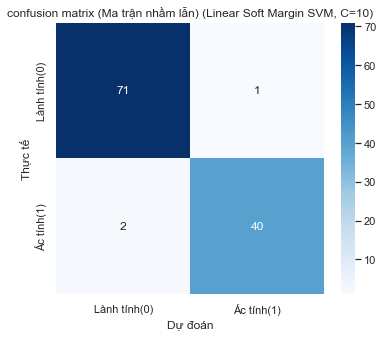

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC  # Sử dụng SVC cho Linear Soft Margin SVM
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score

# Đọc dataset đã làm sạch
data = pd.read_csv('breast_cancer_cleaned.csv')

# Chọn tất cả đặc trưng trừ cột diagnosis
selected_features = [col for col in data.columns if col != 'diagnosis']
X = data[selected_features]
y = data['diagnosis']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Bước: Áp dụng PCA và giữ các PCs có eigenvalue >= 1 (Kaiser Criterion)
# Tính ma trận hiệp phương sai
cov_matrix = np.cov(X_scaled.T)

# Tính giá trị riêng và vector riêng
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sắp xếp giảm dần
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Giữ các PCs có eigenvalue >= 1
n_selected = np.sum(eigenvalues >= 1)  # Số thành phần có eigenvalue >= 1
selected_eigenvalues = eigenvalues[:n_selected]
selected_eigenvectors = eigenvectors[:, :n_selected]
print(f"Số thành phần chính được chọn (eigenvalue >= 1): {n_selected}")

# Vẽ Scree Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--', label='Eigenvalues')
plt.axhline(y=1, color='r', linestyle='--', label='Kaiser Criterion (Eigenvalue = 1)')
plt.title('Scree Plot (Eigenvalues)')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.legend()
plt.grid(True)
plt.show()

# Chuyển đổi dữ liệu sang không gian PCs
X_pca = X_scaled @ selected_eigenvectors  # Dữ liệu đã giảm chiều

# Vẽ biểu đồ "Phân tán PC1 và PC2" (giống với code KNN)
plt.figure(figsize=(8, 6))
# Vẽ scatter plot với màu sắc phân biệt giữa lớp lành tính (0) và ác tính (1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
# Thêm chú thích (legend) cho các lớp
plt.legend(handles=scatter.legend_elements()[0], labels=['Lành tính (0)', 'Ác tính (1)'], title="Nhãn")
plt.title('Scatter Plot giữa PC1 và PC2 (Breast Cancer Data)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True)
plt.show()

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# Thử nghiệm với Linear Soft Margin SVM
# Danh sách các giá trị C để tìm tham số tối ưu
C_values = [0.01, 0.1, 1, 10, 100]
cv_accuracies_linear = []

# Cross-validation để chọn C tối ưu
for C in C_values:
    svm_linear = SVC(kernel='linear', C=C)  # Linear Soft Margin SVM
    scores = cross_val_score(svm_linear, X_pca, y, cv=5, scoring='accuracy')
    cv_accuracies_linear.append(scores.mean())
    print(f"Linear SVM với C={C}: Độ chính xác trung bình (5-fold CV) = {scores.mean():.4f} ± {scores.std():.4f}")

# Tìm C tối ưu
best_C_linear = C_values[np.argmax(cv_accuracies_linear)]
best_cv_accuracy_linear = max(cv_accuracies_linear)
print(f"\nC tối ưu cho Linear SVM từ 5-fold cross-validation: {best_C_linear}")
print(f"Độ chính xác trung bình tối ưu (5-fold CV): {best_cv_accuracy_linear:.4f}")

# Huấn luyện lại mô hình Linear SVM với C tối ưu
best_svm_linear = SVC(kernel='linear', C=best_C_linear)
best_svm_linear.fit(X_train, y_train)
y_test_pred_linear = best_svm_linear.predict(X_test)

# Đánh giá mô hình Linear SVM trên tập kiểm tra
accuracy_linear = accuracy_score(y_test, y_test_pred_linear)
precision_linear = precision_score(y_test, y_test_pred_linear)
recall_linear = recall_score(y_test, y_test_pred_linear)
f1_linear = f1_score(y_test, y_test_pred_linear)
conf_matrix_linear = confusion_matrix(y_test, y_test_pred_linear)

print(f"\nKết quả huấn luyện Linear Soft Margin SVM với C={best_C_linear} trên tập kiểm tra:")
print(f"Accuracy: {accuracy_linear:.4f}")
print(f"Precision: {precision_linear:.4f}")
print(f"Recall: {recall_linear:.4f}")
print(f"F1-Score: {f1_linear:.4f}")
print("\nBáo cáo phân loại chi tiết:")
print(classification_report(y_test, y_test_pred_linear, target_names=['Lành tính (0)', 'Ác tính (1)']))
print("\nMa trận nhầm lẫn:")
print(conf_matrix_linear)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_linear, annot=True, fmt='d', cmap='Blues', xticklabels=['Lành tính(0)', 'Ác tính(1)'], yticklabels=['Lành tính(0)', 'Ác tính(1)'])
plt.title(f'confusion matrix (Ma trận nhầm lẫn) (Linear Soft Margin SVM, C={best_C_linear})')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()